# Prueba del modelo Fashion MNIST
Este notebook carga el modelo entrenado, preprocesa imágenes externas y muestra las predicciones.

In [115]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt
from pathlib import Path


In [123]:
# Cargar modelo guardado
# MODEL_PATH = 'models/fashion_mnist_model_1_layer_10_epoc.h5'
# MODEL_PATH = 'models/fashion_mnist_model_2_layer_10_epoc.h5'
# MODEL_PATH = 'models/fashion_mnist_model_3_layer_10_epoc.h5'
# MODEL_PATH = 'models/fashion_mnist_model_1_layer_50_epoc.h5'
MODEL_PATH = 'models/fashion_mnist_model_2_layer_50_epoc.h5'
# MODEL_PATH = 'models/fashion_mnist_model_3_layer_50_epoc.h5'
# MODEL_PATH = 'models/fashion_mnist_model_1_layer_100_epoc.h5'
# MODEL_PATH = 'models/fashion_mnist_model_2_layer_100_epoc.h5'
# MODEL_PATH = 'models/fashion_mnist_model_3_layer_100_epoc.h5'

print("[INFO] Cargando modelo...")
model = load_model(MODEL_PATH)

[INFO] Cargando modelo...


In [124]:
# Clases del dataset Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [125]:
def plot_image(i, predictions_array, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    confidence = 100 * np.max(predictions_array)
    plt.xlabel(f"{class_names[predicted_label]} {confidence:.2f}%", color='blue')

def plot_value_array(predictions_array):
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    bars = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    bars[predicted_label].set_color('red')

def load_and_preprocess_image(path):
    img = Image.open(path).convert('L')
    img = ImageOps.invert(img)                     # invertir colores (negativo)
    img = img.resize((28, 28))
    img_array = np.array(img).astype('float32') / 255.0
    return img_array.reshape(1, 28, 28, 1), img

## Prueba con imágenes
Cambiar la ruta por la imagen que quieras probar, deben estar en `test_images`

In [126]:
test_folder = Path('test_images')
img_files = [f for f in test_folder.glob('*') if f.suffix.lower() in ['.png', '.jpg', '.jpeg']]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


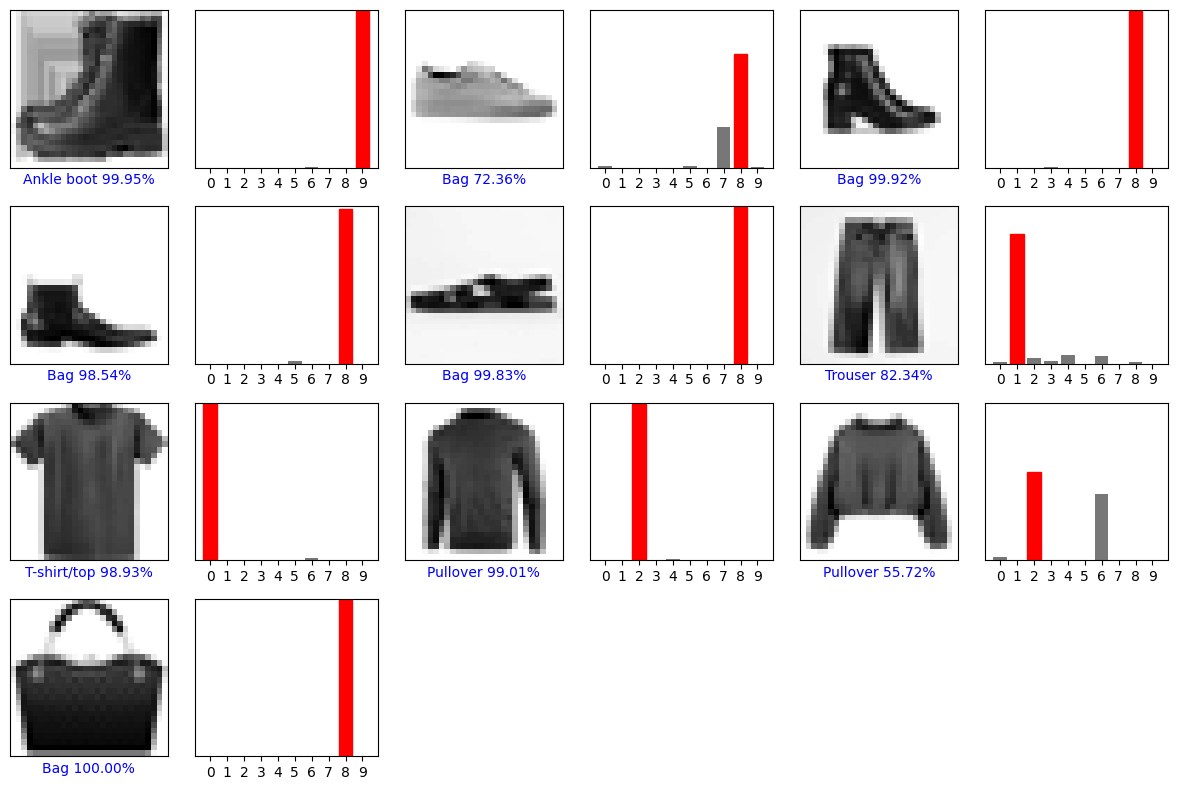

In [127]:
num_cols = 3
num_rows = (len(img_files) + num_cols - 1) // num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i, img_file in enumerate(img_files):
    img_pre, img = load_and_preprocess_image(img_file)
    preds = model.predict(img_pre)[0]

    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, preds, img)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(preds)

plt.tight_layout()
plt.show()